In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline



In [2]:
# The code was removed by Watson Studio for sharing.

,ID,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW
0,610339,713.0,STORES,3.0,CAR_USED,3103.0,NONE,1
1,109167,341.0,STORES,1.0,CAR_NEW,716.0,NONE,1
2,823322,868.0,NONE,4.0,APPLIANCES,4333.0,NONE,1
3,322224,310.0,STORES,2.0,FURNITURE,250.0,NONE,1
4,912693,620.0,NONE,2.0,CAR_USED,2454.0,NONE,0


In [3]:

body = client_51ac9752a63648d2959e66f034dfa6f3.get_object(Bucket='desafio1-donotdelete-pr-kz3ec0aucx4ash',Key='DEMOGRAPHICS.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,ID,SEX,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION
0,24252,M,47.0,3.0,1.0,0.0,1.0,14.0,SAVINGS_INSURANCE,OWN,3.0
1,1002018,M,19.0,3.0,1.0,0.0,1.0,0.0,SAVINGS_INSURANCE,RENT,2.0
2,1240455,F,50.0,2.0,1.0,1.0,1.0,7.0,UNKNOWN,OWN,3.0
3,107799,M,35.0,3.0,1.0,0.0,1.0,0.0,REAL_ESTATE,OWN,2.0
4,184883,M,40.0,1.0,1.0,0.0,1.0,9.0,CAR_OTHER,OWN,4.0


In [4]:

body = client_51ac9752a63648d2959e66f034dfa6f3.get_object(Bucket='desafio1-donotdelete-pr-kz3ec0aucx4ash',Key='ACCOUNTS.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()


,ID,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT
0,291655,-566.53,ALL_CREDITS_PAID_BACK,36.42,1.0
1,657079,-1673.16,CREDITS_PAID_TO_DATE,22.9,1.0
2,256050,NO_CHECKING,CREDITS_PAID_TO_DATE,450.35,2.0
3,1039151,-1471.03,PRIOR_PAYMENTS_DELAYED,805.71,2.0
4,1002660,NO_CHECKING,CREDITS_PAID_TO_DATE,295.03,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   3999 non-null   int64  
 1   PAYMENT_TERM         3975 non-null   float64
 2   INSTALLMENT_PLANS    3978 non-null   object 
 3   INSTALLMENT_PERCENT  3974 non-null   float64
 4   LOAN_PURPOSE         3979 non-null   object 
 5   LOAN_AMOUNT          3981 non-null   float64
 6   OTHERS_ON_LOAN       3977 non-null   object 
 7   ALLOW                3999 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 250.1+ KB


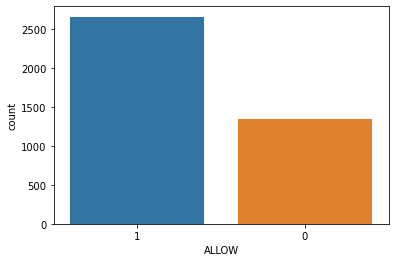

In [5]:
loans = df_data_1
loans.info()
loans.describe()
risk_plot = sns.countplot(data=loans, x='ALLOW', order=loans['ALLOW'].value_counts().index)
plt.show()

In [6]:
demographics = df_data_2
demographics.info()
demographics.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          3936 non-null   int64  
 1   SEX                         3920 non-null   object 
 2   AGE                         3918 non-null   float64
 3   JOB_TYPE                    3910 non-null   float64
 4   DEPENDENTS                  3915 non-null   float64
 5   TELEPHONE                   3915 non-null   float64
 6   FOREIGN_WORKER              3909 non-null   float64
 7   EMPLOYMENT_DURATION         3923 non-null   float64
 8   PROPERTY                    3918 non-null   object 
 9   HOUSING                     3912 non-null   object 
 10  CURRENT_RESIDENCE_DURATION  3917 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 338.4+ KB


,ID,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,CURRENT_RESIDENCE_DURATION
count,3.936000e+03,3918.000000,3910.000000,3915.000000,3915.000000,3909.000000,3923.000000,3917.000000
mean,6.614226e+05,36.032925,2.429923,1.161175,0.412005,0.975697,4.238848,2.865458
std,3.731249e+05,10.617743,0.931842,0.367739,0.492259,0.154008,3.595680,1.115873
min,9.800000e+01,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.427448e+05,28.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000
50%,6.679115e+05,36.000000,3.000000,1.000000,0.000000,1.000000,4.000000,3.000000
75%,9.794970e+05,44.000000,3.000000,1.000000,1.000000,1.000000,7.000000,4.000000
max,1.320082e+06,74.000000,3.000000,2.000000,1.000000,1.000000,18.000000,6.000000


In [7]:
accounts = df_data_3
accounts.info()
accounts.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      2477 non-null   int64  
 1   CHECKING_BALANCE        2467 non-null   object 
 2   CREDIT_HISTORY          2462 non-null   object 
 3   EXISTING_SAVINGS        2467 non-null   object 
 4   EXISTING_CREDITS_COUNT  2463 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 96.9+ KB


,ID,EXISTING_CREDITS_COUNT
count,2.477000e+03,2463.000000
mean,6.683799e+05,1.469752
std,3.730570e+05,0.569142
min,9.800000e+01,1.000000
25%,3.521920e+05,1.000000
50%,6.809460e+05,1.000000
75%,9.857560e+05,2.000000
max,1.319964e+06,3.000000


In [8]:
clean_df = loans.dropna()
#INSTALLMENT_PLANS_CAT=pd.get_dummies(clean_df['INSTALLMENT_PLANS'])
#LOAN_PURPOSE_CAT=pd.get_dummies(clean_df['LOAN_PURPOSE'])
#OTHERS_ON_LOAN_CAT=pd.get_dummies(clean_df['OTHERS_ON_LOAN'])
clean_df.head()
#clean_df =pd.concat((clean_df,OTHERS_ON_LOAN_CAT,LOAN_PURPOSE_CAT,INSTALLMENT_PLANS_CAT), axis=1)
#loans_clean_df=clean_df.drop(['INSTALLMENT_PLANS','LOAN_PURPOSE','OTHERS_ON_LOAN'], axis=1)

,ID,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW
0,610339,713.0,STORES,3.0,CAR_USED,3103.0,NONE,1
1,109167,341.0,STORES,1.0,CAR_NEW,716.0,NONE,1
2,823322,868.0,NONE,4.0,APPLIANCES,4333.0,NONE,1
3,322224,310.0,STORES,2.0,FURNITURE,250.0,NONE,1
4,912693,620.0,NONE,2.0,CAR_USED,2454.0,NONE,0


In [9]:
clean_df2 = demographics.dropna()
#SEX=pd.get_dummies(clean_df2['SEX'])
#PROPERTY_CAT=pd.get_dummies(clean_df2['PROPERTY'])
#HOUSING_CAT=pd.get_dummies(clean_df2['HOUSING'])
#clean_df2 =pd.concat((clean_df2,SEX,PROPERTY_CAT,HOUSING_CAT), axis=1)
#demographics_clean_df=clean_df2.drop(['PROPERTY','HOUSING','SEX'], axis=1)

In [10]:
clean_df3 = accounts.dropna()
#clean_df3 = clean_df3.drop(clean_df3[clean_df3['EXISTING_SAVINGS']=='UNKNOWN'].index)
#clean_df3['CHECKING_BALANCE']= clean_df3['CHECKING_BALANCE'].replace('NO_CHECKING','0')
#clean_df3['CHECKING_BALANCE'] = pd.to_numeric(clean_df3['CHECKING_BALANCE'],errors = 'coerce')
#clean_df3['EXISTING_SAVINGS'] = pd.to_numeric(clean_df3['EXISTING_SAVINGS'],errors = 'coerce')
#CREDIT_HISTORY_CAT=pd.get_dummies(clean_df3['CREDIT_HISTORY'])
#clean_df3 =pd.concat((clean_df3,CREDIT_HISTORY_CAT), axis=1)
#accounts_clean_df=clean_df3.drop(['CREDIT_HISTORY'], axis=1)


In [11]:
merged_inner = pd.merge(left=clean_df,right=clean_df2, left_on='ID', right_on='ID')
merged_inner = pd.merge(left=merged_inner,right=clean_df3, left_on='ID', right_on='ID')
merged_inner.info()
merged_inner.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2236
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2237 non-null   int64  
 1   PAYMENT_TERM                2237 non-null   float64
 2   INSTALLMENT_PLANS           2237 non-null   object 
 3   INSTALLMENT_PERCENT         2237 non-null   float64
 4   LOAN_PURPOSE                2237 non-null   object 
 5   LOAN_AMOUNT                 2237 non-null   float64
 6   OTHERS_ON_LOAN              2237 non-null   object 
 7   ALLOW                       2237 non-null   int64  
 8   SEX                         2237 non-null   object 
 9   AGE                         2237 non-null   float64
 10  JOB_TYPE                    2237 non-null   float64
 11  DEPENDENTS                  2237 non-null   float64
 12  TELEPHONE                   2237 non-null   float64
 13  FOREIGN_WORKER              2237 

Index(['ID', 'PAYMENT_TERM', 'INSTALLMENT_PLANS', 'INSTALLMENT_PERCENT',
       'LOAN_PURPOSE', 'LOAN_AMOUNT', 'OTHERS_ON_LOAN', 'ALLOW', 'SEX', 'AGE',
       'JOB_TYPE', 'DEPENDENTS', 'TELEPHONE', 'FOREIGN_WORKER',
       'EMPLOYMENT_DURATION', 'PROPERTY', 'HOUSING',
       'CURRENT_RESIDENCE_DURATION', 'CHECKING_BALANCE', 'CREDIT_HISTORY',
       'EXISTING_SAVINGS', 'EXISTING_CREDITS_COUNT'],
      dtype='object')

In [12]:
merged_inner = merged_inner.drop(merged_inner[merged_inner['EXISTING_SAVINGS']=='UNKNOWN'].index)
merged_inner['CHECKING_BALANCE']= merged_inner['CHECKING_BALANCE'].replace('NO_CHECKING','0')
merged_inner = merged_inner.drop(merged_inner[merged_inner['EXISTING_SAVINGS']=='UNKNOWN'].index)
INSTALLMENT_PLANS_CAT=pd.get_dummies(merged_inner['INSTALLMENT_PLANS'])
LOAN_PURPOSE_CAT=pd.get_dummies(merged_inner['LOAN_PURPOSE'])
OTHERS_ON_LOAN_CAT=pd.get_dummies(merged_inner['OTHERS_ON_LOAN'])

SEX=pd.get_dummies(merged_inner['SEX'])
PROPERTY_CAT=pd.get_dummies(merged_inner['PROPERTY'])
HOUSING_CAT=pd.get_dummies(merged_inner['HOUSING'])


merged_inner['CHECKING_BALANCE'] = pd.to_numeric(merged_inner['CHECKING_BALANCE'],errors = 'coerce')
merged_inner['EXISTING_SAVINGS'] = pd.to_numeric(merged_inner['EXISTING_SAVINGS'],errors = 'coerce')
CREDIT_HISTORY_CAT=pd.get_dummies(merged_inner['CREDIT_HISTORY'])

merged_inner =pd.concat((merged_inner,OTHERS_ON_LOAN_CAT,LOAN_PURPOSE_CAT,INSTALLMENT_PLANS_CAT), axis=1)
merged_inner=merged_inner.drop(['INSTALLMENT_PLANS','LOAN_PURPOSE','OTHERS_ON_LOAN'], axis=1)

merged_inner =pd.concat((merged_inner,SEX,PROPERTY_CAT,HOUSING_CAT), axis=1)
merged_inner=merged_inner.drop(['PROPERTY','HOUSING','SEX'], axis=1)

merged_inner =pd.concat((merged_inner,CREDIT_HISTORY_CAT), axis=1)
merged_inner=merged_inner.drop(['CREDIT_HISTORY'], axis=1)

In [13]:
merged_inner.dropna()
merged_inner.info()
merged_inner.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2234
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2075 non-null   int64  
 1   PAYMENT_TERM                2075 non-null   float64
 2   INSTALLMENT_PERCENT         2075 non-null   float64
 3   LOAN_AMOUNT                 2075 non-null   float64
 4   ALLOW                       2075 non-null   int64  
 5   AGE                         2075 non-null   float64
 6   JOB_TYPE                    2075 non-null   float64
 7   DEPENDENTS                  2075 non-null   float64
 8   TELEPHONE                   2075 non-null   float64
 9   FOREIGN_WORKER              2075 non-null   float64
 10  EMPLOYMENT_DURATION         2075 non-null   float64
 11  CURRENT_RESIDENCE_DURATION  2075 non-null   float64
 12  CHECKING_BALANCE            2075 non-null   float64
 13  EXISTING_SAVINGS            2075 

Index(['ID', 'PAYMENT_TERM', 'INSTALLMENT_PERCENT', 'LOAN_AMOUNT', 'ALLOW',
       'AGE', 'JOB_TYPE', 'DEPENDENTS', 'TELEPHONE', 'FOREIGN_WORKER',
       'EMPLOYMENT_DURATION', 'CURRENT_RESIDENCE_DURATION', 'CHECKING_BALANCE',
       'EXISTING_SAVINGS', 'EXISTING_CREDITS_COUNT', 'CO-APPLICANT',
       'GUARANTOR', 'NONE', 'APPLIANCES', 'BUSINESS', 'CAR_NEW', 'CAR_USED',
       'EDUCATION', 'FURNITURE', 'OTHER', 'RADIO_TV', 'REPAIRS', 'RETRAINING',
       'VACATION', 'BANK', 'NONE', 'STORES', 'F', 'M', 'CAR_OTHER',
       'REAL_ESTATE', 'SAVINGS_INSURANCE', 'UNKNOWN', 'FREE', 'OWN', 'RENT',
       'ALL_CREDITS_PAID_BACK', 'CREDITS_PAID_TO_DATE', 'NO_CREDITS',
       'OUTSTANDING_CREDIT', 'PRIOR_PAYMENTS_DELAYED'],
      dtype='object')

<AxesSubplot:xlabel='ALLOW', ylabel='Count'>

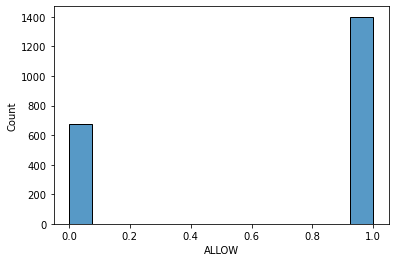

In [14]:
sns.histplot(merged_inner['ALLOW'])

In [15]:
y = merged_inner['ALLOW']
X = merged_inner[['PAYMENT_TERM', 'INSTALLMENT_PERCENT', 'LOAN_AMOUNT',
       'CO-APPLICANT', 'GUARANTOR', 'NONE', 'APPLIANCES', 'BUSINESS',
       'CAR_NEW', 'CAR_USED', 'EDUCATION', 'FURNITURE', 'OTHER', 'RADIO_TV',
       'REPAIRS', 'RETRAINING', 'VACATION', 'BANK', 'NONE', 'STORES', 'AGE',
       'JOB_TYPE', 'DEPENDENTS', 'TELEPHONE', 'FOREIGN_WORKER',
       'EMPLOYMENT_DURATION', 'CURRENT_RESIDENCE_DURATION', 'F', 'M',
       'CAR_OTHER', 'REAL_ESTATE', 'SAVINGS_INSURANCE', 'UNKNOWN', 'FREE',
       'OWN', 'RENT', 'CHECKING_BALANCE', 'EXISTING_SAVINGS',
       'EXISTING_CREDITS_COUNT', 'ALL_CREDITS_PAID_BACK',
       'CREDITS_PAID_TO_DATE', 'NO_CREDITS', 'OUTSTANDING_CREDIT',
       'PRIOR_PAYMENTS_DELAYED']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)
arbol_model = DecisionTreeClassifier()
arbol_model.fit(X_train,y_train)
arbol_model.predict(X_test)
y_pred = arbol_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo (número de predicciones asertadas sobre el número total de pruebas): {acc}")
print(arbol_model.score(X_test, y_test))

Exactitud del modelo (número de predicciones asertadas sobre el número total de pruebas): 0.689156626506024
0.689156626506024


In [16]:
# Instalar la biblioteca WML
!pip install -U ibm-watson-machine-learning

In [17]:
from ibm_watson_machine_learning import APIClient

In [70]:
api_key = ''
location = 'eu-de' # En caso de WML estar en una región diferente, altere esta linea

wml_credentials = {
    "apikey": api_key,
    "url": 'https://' + location + '.ml.cloud.ibm.com'
}

client = APIClient(wml_credentials)

In [ ]:
# Lista espacios creados en su instancia de WML
client.spaces.list(limit=10)

In [ ]:
client.spaces.list(limit=10)

In [91]:
challenge_columns = ['ID', 'CHECKING_BALANCE', 'PAYMENT_TERM', 'CREDIT_HISTORY',
       'LOAN_PURPOSE', 'LOAN_AMOUNT', 'EXISTING_SAVINGS',
       'EMPLOYMENT_DURATION', 'INSTALLMENT_PERCENT', 'SEX', 'OTHERS_ON_LOAN',
       'CURRENT_RESIDENCE_DURATION', 'PROPERTY', 'AGE', 'INSTALLMENT_PLANS',
       'HOUSING', 'EXISTING_CREDITS_COUNT', 'JOB_TYPE', 'DEPENDENTS',
       'TELEPHONE', 'FOREIGN_WORKER', 'ALLOW']

# Un transformador 
class ConvertData(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Primero realizamos la cópia del DataFrame 'X' de entrada
        data = X.copy()
        data = data.drop(data[data['EXISTING_SAVINGS']=='UNKNOWN'].index)
        data['CHECKING_BALANCE']= data['CHECKING_BALANCE'].replace('NO_CHECKING','0')
        data = data.drop(data[data['EXISTING_SAVINGS']=='UNKNOWN'].index)
        INSTALLMENT_PLANS_CAT=pd.get_dummies(data['INSTALLMENT_PLANS'])
        LOAN_PURPOSE_CAT=pd.get_dummies(data['LOAN_PURPOSE'])
        OTHERS_ON_LOAN_CAT=pd.get_dummies(data['OTHERS_ON_LOAN'])
        SEX=pd.get_dummies(data['SEX'])
        PROPERTY_CAT=pd.get_dummies(data['PROPERTY'])
        HOUSING_CAT=pd.get_dummies(data['HOUSING'])
        data['CHECKING_BALANCE'] = pd.to_numeric(data['CHECKING_BALANCE'],errors = 'coerce')
        data['EXISTING_SAVINGS'] = pd.to_numeric(data['EXISTING_SAVINGS'],errors = 'coerce')
        CREDIT_HISTORY_CAT=pd.get_dummies(data['CREDIT_HISTORY'])
        data =pd.concat((data,OTHERS_ON_LOAN_CAT,LOAN_PURPOSE_CAT,INSTALLMENT_PLANS_CAT), axis=1)
        data=data.drop(['INSTALLMENT_PLANS','LOAN_PURPOSE','OTHERS_ON_LOAN'], axis=1)
        data =pd.concat((data,SEX,PROPERTY_CAT,HOUSING_CAT), axis=1)
        data=data.drop(['PROPERTY','HOUSING','SEX'], axis=1)
        data =pd.concat((data,CREDIT_HISTORY_CAT), axis=1)
        data=data.drop(['CREDIT_HISTORY'], axis=1)
        # Retornamos um nuevo dataframe sin las colunmas indeseadas
        return data.dropna()
features = ['ID' 'PAYMENT_TERM', 'INSTALLMENT_PLANS', 'INSTALLMENT_PERCENT',
       'LOAN_PURPOSE', 'LOAN_AMOUNT', 'OTHERS_ON_LOAN', 'SEX', 'AGE',
       'JOB_TYPE', 'DEPENDENTS', 'TELEPHONE', 'FOREIGN_WORKER',
       'EMPLOYMENT_DURATION', 'PROPERTY', 'HOUSING',
       'CURRENT_RESIDENCE_DURATION', 'CHECKING_BALANCE', 'CREDIT_HISTORY',
       'EXISTING_SAVINGS', 'EXISTING_CREDITS_COUNT']
target = ['ALLOW']  
unwanted_columns = list((set(challenge_columns) - set(target))) # Remover todas las colunmas que no son features do nuestro modelo
data_convert = ConvertData(unwanted_columns)

pipeline = Pipeline(steps=[('ConvertData', data_convert), ('classification', arbol_model)])
pipeline

Pipeline(steps=[('ConvertData',
                 ConvertData(columns=['CREDIT_HISTORY', 'LOAN_PURPOSE', 'AGE',
                                      'LOAN_AMOUNT', 'CHECKING_BALANCE',
                                      'EMPLOYMENT_DURATION',
                                      'EXISTING_CREDITS_COUNT', 'TELEPHONE',
                                      'ID', 'DEPENDENTS',
                                      'CURRENT_RESIDENCE_DURATION',
                                      'INSTALLMENT_PLANS', 'EXISTING_SAVINGS',
                                      'HOUSING', 'PAYMENT_TERM', 'SEX',
                                      'OTHERS_ON_LOAN', 'FOREIGN_WORKER',
                                      'JOB_TYPE', 'INSTALLMENT_PERCENT',
                                      'PROPERTY'])),
                ('classification', DecisionTreeClassifier())])

In [75]:
!rm -rf watson-sklearn-transforms # Remover carpeta en caso de que ya exista
!git clone https://github.com/AnderssonSanabria/watson-sklearn-transforms.git # Clonar el repositório con el pacote
!zip -r drop-columns.zip watson-sklearn-transforms # Zippear el paquete
!pip install drop-columns.zip # Instalar el paquete zippeado

Cloning into 'watson-sklearn-transforms'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 63 (delta 0), reused 0 (delta 0), pack-reused 59
Unpacking objects: 100% (63/63), 10.94 KiB | 127.00 KiB/s, done.
updating: watson-sklearn-transforms/ (stored 0%)
updating: watson-sklearn-transforms/setup.py (deflated 46%)
updating: watson-sklearn-transforms/my_custom_sklearn_transforms.egg-info/ (stored 0%)
updating: watson-sklearn-transforms/my_custom_sklearn_transforms.egg-info/not-zip-safe (stored 0%)
updating: watson-sklearn-transforms/my_custom_sklearn_transforms.egg-info/SOURCES.txt (deflated 48%)
updating: watson-sklearn-transforms/my_custom_sklearn_transforms.egg-info/PKG-INFO (deflated 33%)
updating: watson-sklearn-transforms/my_custom_sklearn_transforms.egg-info/top_level.txt (stored 0%)
updating: watson-sklearn-transforms/my_custom_sklearn_transforms.egg-info/dependency_links.txt (stored 0

In [92]:
from my_custom_sklearn_transforms.sklearn_transformers import DropColumns

drop_columns = DropColumns(unwanted_columns)

pipeline = Pipeline(steps=[('drop_columns', drop_columns), ('classification', arbol_model)])
pipeline

Pipeline(steps=[('drop_columns',
                 DropColumns(columns=['CREDIT_HISTORY', 'LOAN_PURPOSE', 'AGE',
                                      'LOAN_AMOUNT', 'CHECKING_BALANCE',
                                      'EMPLOYMENT_DURATION',
                                      'EXISTING_CREDITS_COUNT', 'TELEPHONE',
                                      'ID', 'DEPENDENTS',
                                      'CURRENT_RESIDENCE_DURATION',
                                      'INSTALLMENT_PLANS', 'EXISTING_SAVINGS',
                                      'HOUSING', 'PAYMENT_TERM', 'SEX',
                                      'OTHERS_ON_LOAN', 'FOREIGN_WORKER',
                                      'JOB_TYPE', 'INSTALLMENT_PERCENT',
                                      'PROPERTY'])),
                ('classification', DecisionTreeClassifier())])

In [77]:
# Metadatos para el paquete customizado
meta_prop_pkg_extn = {
    client.package_extensions.ConfigurationMetaNames.NAME: "Drop_Columns",
    client.package_extensions.ConfigurationMetaNames.DESCRIPTION: "Extensión para remover columnas",
    client.package_extensions.ConfigurationMetaNames.TYPE: "pip_zip"
}

# Subir el paquete
pkg_extn_details = client.package_extensions.store(meta_props=meta_prop_pkg_extn, file_path="drop-columns.zip")

# Guardar las informaciones sobre el paquete
pkg_extn_uid = client.package_extensions.get_uid(pkg_extn_details)
pkg_extn_url = client.package_extensions.get_href(pkg_extn_details)

Creating package extensions
SUCCESS


In [78]:

# Subir el paquete
pkg_extn_details = client.package_extensions.store(meta_props=meta_prop_pkg_extn, file_path="drop-columns.zip")

# Guardar las informaciones sobre el paquete
pkg_extn_uid = client.package_extensions.get_uid(pkg_extn_details)
pkg_extn_url = client.package_extensions.get_href(pkg_extn_details)

Creating package extensions
SUCCESS


In [79]:
base_sw_spec_uid = client.software_specifications.get_uid_by_name("default_py3.8")


In [80]:
# Metadatos de la nueva especificación de software
meta_prop_sw_spec = {
    client.software_specifications.ConfigurationMetaNames.NAME: "sw_spec_drop_columns",
    client.software_specifications.ConfigurationMetaNames.DESCRIPTION: "Software specification for ConvertData",
    client.software_specifications.ConfigurationMetaNames.BASE_SOFTWARE_SPECIFICATION: {"guid": base_sw_spec_uid}
}

# Creando la nueva especificacion de software y obteniendo su ID
sw_spec_details = client.software_specifications.store(meta_props=meta_prop_sw_spec)
sw_spec_uid = client.software_specifications.get_uid(sw_spec_details)

# Agregar el paquete personalizado a la nueva especificación
client.software_specifications.add_package_extension(sw_spec_uid, pkg_extn_uid)

SUCCESS


'SUCCESS'

In [ ]:
# Metadatos del modelo
model_props = {
    client.repository.ModelMetaNames.NAME: "Modelo com Pipeline customizada",
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sw_spec_uid
}

# Publicando el Pipeline como um modelo
published_model = client.repository.store_model(model=pipeline, meta_props=model_props)
published_model_uid = client.repository.get_model_uid(published_model)
client.repository.get_details(published_model_uid)

In [ ]:
published_model_uid

In [ ]:
# Metadatos para publicación del modelo
metadata = {
    client.deployments.ConfigurationMetaNames.NAME: "Publicación de modelo customizado",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

# Publicar
created_deployment = client.deployments.create(published_model_uid, meta_props=metadata)
#deployment_uid = client.deployments.get_uid(created_deployment)


In [ ]:

print(f"Credenciales para el envio (no compartir estos datos con nadie!)\n\nAPI key: {api_key}\nDeployment ID: {''}")